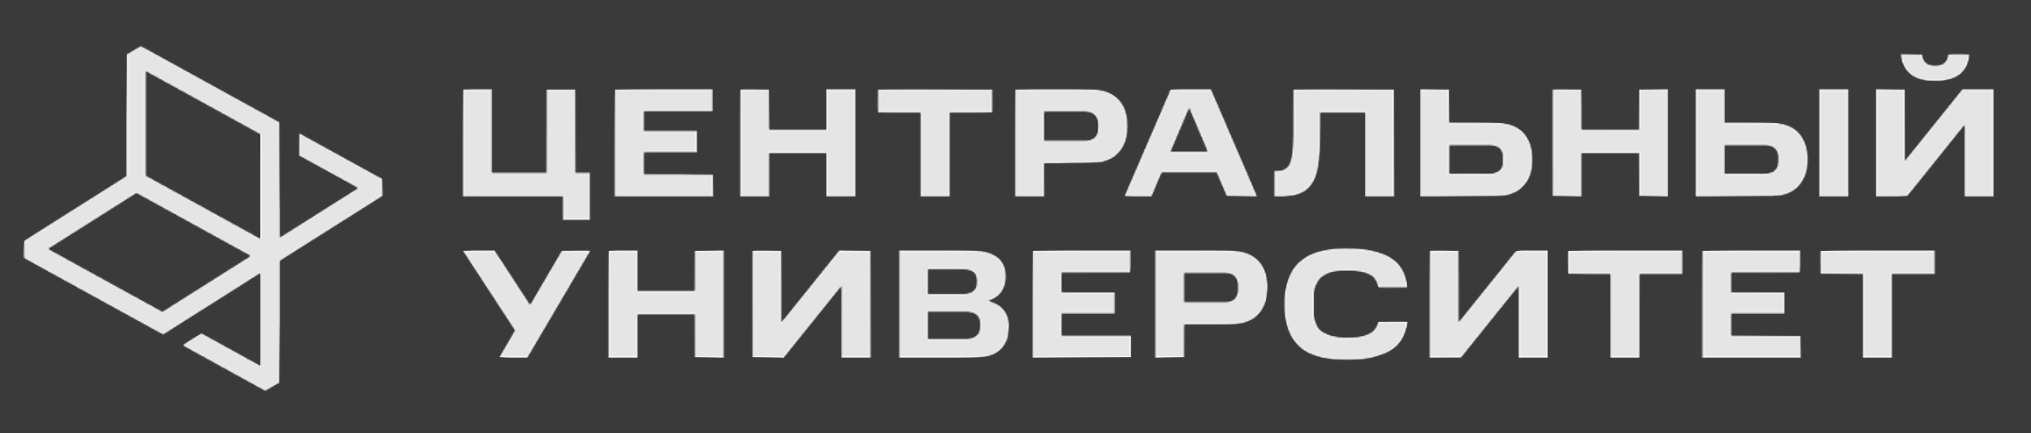

# Домашняя работа по теме «Вероятностное обучение»

Это домашнее задание состоит из двух блоков:

* в первом мы сгенерируем  выборку данных, на основе которой нужно выполнить 6 задач;
* во втором используется готовый набор данных, нужно выполнить 2 задачи.

Прежде чем приступить к задачам, импортируй библиотеки:


In [1]:
import plotly.graph_objects as go
import numpy                as np
import pandas               as pd
import seaborn as sns
import plotly.express as px
import itertools
import random
import os

np.random.seed(52)

## Блок 1. Мешок с шариками

Чтобы сформулировать условия для следующих задач, сделаем два шага:

1. Определим исходные вероятности для следующей задачи:
> В мешке лежат шарики различных цветов: красного, синего, зелёного и жёлтого — и разного размера: большие, средние и маленькие. Таким образом, из мешка можно вытащить, например, красный большой, жёлтый маленький или другие сочетания — всего возможны 12 типов.

2. Воспользуемся набором вероятностей, полученных на предыдущем шаге,  и сгенерируем случайную выборку шариков разного типа. Для этой выборки получим частотную вероятность появления каждого типа шариков (она будет различна для каждого студента).

<!-- 3. Вычислим частотную вероятность для каждого типа шариков и сравним ее с исходным набором вероятностей. -->




<!-- 1. Определим вероятность выпадения каждого типа шариков;

2. Воспользуемся набором вероятностей и сгенерируем случайную выборку шариков разного типа;

3. Вычислим частотную вероятность для каждого типа шариков и сравним ее иходным набором вероятностей.



> **Частотная вероятность** показывает, как часто встречаются шарики разных типов в твоей выборке. -->

<!-- ## Задача 1. Бассейн с шариками

В мешке лежит шарики красного, синего, зеленого и желтого цвета, а также разного размера большие, средние и маленькие. Сгенерируем вероятность выпадения каждой из групп шариков. Далее вам предлагается сгенерировать выборку шариков, вычислить частотную вероятность для каждого их классов.
Частотная вероятность используется далее для ваших ответов и именно она, поэтому ваши ответы будут разными. -->

### 1. Подсчёт исходных вероятностей

In [2]:
ball_color_s = ['red', 'blue', 'green', 'yellow']
ball_size_s  = ['small', 'medium', 'big']

ball_type_s = list(itertools.product(ball_color_s, ball_size_s))

color_probability_s = np.random.dirichlet(np.ones(len(ball_color_s)), size=1)[0]
size_probability_s  = np.random.dirichlet(np.ones(len(ball_size_s )), size=1)[0]

ball_probability_s = np.outer(color_probability_s, size_probability_s ).flatten()

ball_probability_s = dict(zip(ball_type_s, ball_probability_s))

In [3]:
color_probability_s

array([0.58544357, 0.00894445, 0.07999721, 0.32561477])

Вычислим вероятности выпадения каждой из групп шариков:

In [4]:
for color_type, probability in ball_probability_s.items():
    print(f'P( {color_type[0]: <7} {color_type[1]: <7}) = {probability}')

P( red     small  ) = 0.053752837172823156
P( red     medium ) = 0.5029082267030643
P( red     big    ) = 0.028782506326624973
P( blue    small  ) = 0.0008212394748688895
P( blue    medium ) = 0.007683465835989051
P( blue    big    ) = 0.000439741074598361
P( green   small  ) = 0.0073449898151590155
P( green   medium ) = 0.06871927134222529
P( green   big    ) = 0.003932949904469331
P( yellow  small  ) = 0.029896507076080037
P( yellow  medium ) = 0.27970987484635806
P( yellow  big    ) = 0.016008390427739494


Вероятности выпадения каждого цвета:

In [5]:
from collections import defaultdict

color_probability_s = defaultdict(float)
for (color_, type_), value in ball_probability_s.items():
    color_probability_s[color_] += value

for color_, probability in color_probability_s.items():
    print(f'P( {color_: <7}) = {probability}')

P( red    ) = 0.5854435702025125
P( blue   ) = 0.008944446385456302
P( green  ) = 0.07999721106185365
P( yellow ) = 0.3256147723501776


И вероятности выпадения каждого размера:

In [6]:
from collections import defaultdict

type_probability_s = defaultdict(float)
for (color_, type_), value in ball_probability_s.items():
    type_probability_s[type_] += value

for type_, probability in type_probability_s.items():
    print(f'P( {type_: <7}) = {probability}')

P( small  ) = 0.09181557353893109
P( medium ) = 0.8590208387276368
P( big    ) = 0.04916358773343216




#### Задача 1.1 [1 балл]

Какова вероятность того, что вытянутый шарик будет зелёным, если известно, что он точно не красный?

<!-- Какова вероятность того, что вытянутый шарик зелёного цвета, при условии, что это не красный шарик? -->


In [7]:
print(color_probability_s['green']/(1-color_probability_s['red']))

0.1929706194665286


#### Задача 1.2 [1 балл]
Какова вероятность вытянуть шарик, который либо красный, либо жёлтый?

In [8]:
print(color_probability_s['yellow']+color_probability_s['red'])

0.9110583425526901


#### Задача 1.3 [1 балл]

Если вытянуть один шарик, вернуть его в мешок и затем вытянуть второй шарик, какова вероятность того, что оба шарика будут синими?

In [9]:
print(color_probability_s["blue"]**2)

8.000312114230231e-05


#### Задача 1.4 [1 балл]

Ты наугад вытягиваешь один шарик, и он оказывается большим. Какова вероятность того, что этот шарик красный?

In [10]:
print(ball_probability_s[('red', 'big')]/type_probability_s['big'])

0.5854435702025126


### Генерация выборки из 100 шариков
Сгенерируем случайную выборку из 100 шариков красного, синего, зелёного и жёлтого цвета.

In [11]:
def generate_multinomial_samples(ball_probability_s, n = 100):
    color_s       = list(ball_probability_s.keys  ())
    probability_s = list(ball_probability_s.values())

    # Генерируем случайную выборку
    random_sample_s = random.choices(color_s, weights = probability_s, k = n)
    return random_sample_s

random_sample_s = generate_multinomial_samples(ball_probability_s)

In [12]:
random_sample_s[0]

('red', 'medium')

#### Задача 1.5 [1 балл]

Построй гистограмму выборки шариков по цветам. Каждый столбик должен соответствовать своему цвету:
* красный,
* синий,
* зелёный,
* жёлтый.


<!-- #### Задача 1.1 [1 балл]

Нарисуй гистограмму нашей выборки шаров разного цвета. Каждый столбик имеет соответствующий цвет (красный, синий, зеленый, оранжевый). -->

In [13]:
colors_counter = dict()
for i in range(len(random_sample_s)):
    colors_counter[random_sample_s[i][0]] = (
        colors_counter.get(random_sample_s[i][0], 0) + 1
    )
fig = go.Figure(
    [go.Bar(x=ball_color_s, y=list(colors_counter.values()), marker_color=ball_color_s)]
)
fig.update_layout(
    title="Гистограмма выборки шариков по цвету",
    xaxis_title="Цвет",
    yaxis_title="Количество",
)
fig.show()

Построй гистограмму выборки шариков по размеру. Подпиши столбики:
* маленький,
* средний,
* большой.

<!-- Нарисуйте гистограмму нашей выборки шаров разного размера. Подпишите каждый столбик (маленький, средний, большой). -->

In [14]:
size_counter = dict()
for i in range(len(random_sample_s)):
    size_counter[random_sample_s[i][0]] = (
        size_counter.get(random_sample_s[i][0], 0) + 1
    )
fig = go.Figure(
    [go.Bar(x=ball_size_s, y=list(colors_counter.values()))]
)
fig.update_layout(
    title="Гистограмма выборки шариков по размеру",
    xaxis_title="Размер",
    yaxis_title="Количество",
)
fig.show()

#### Задача 1.6 [1 балл]
Рассчитай частотную вероятность цвета каждого из типа шариков. Сравни с исходной вероятностью, которая использовалась при генерации выборки.

In [15]:
frequency_probability_s = defaultdict(float)
for ball_type in ball_type_s:
    frequency_probability_s[ball_type] = random_sample_s.count(ball_type) / len(
        random_sample_s
    )

for ball_type, frequency_probability in frequency_probability_s.items():
    initial_probability = ball_probability_s[ball_type]
    print(
        f"P_частотная({ball_type[0]:<7} {ball_type[1]:<7}) = {frequency_probability:.4f}, P_исходная = {initial_probability:.4f}"
    )


P_частотная(red     small  ) = 0.0400, P_исходная = 0.0538
P_частотная(red     medium ) = 0.5900, P_исходная = 0.5029
P_частотная(red     big    ) = 0.0200, P_исходная = 0.0288
P_частотная(blue    small  ) = 0.0000, P_исходная = 0.0008
P_частотная(blue    medium ) = 0.0000, P_исходная = 0.0077
P_частотная(blue    big    ) = 0.0000, P_исходная = 0.0004
P_частотная(green   small  ) = 0.0000, P_исходная = 0.0073
P_частотная(green   medium ) = 0.0600, P_исходная = 0.0687
P_частотная(green   big    ) = 0.0000, P_исходная = 0.0039
P_частотная(yellow  small  ) = 0.0300, P_исходная = 0.0299
P_частотная(yellow  medium ) = 0.2500, P_исходная = 0.2797
P_частотная(yellow  big    ) = 0.0100, P_исходная = 0.0160


## Блок 2. Задача регрессии на наборе данных `Diabetes Dataset`
Diabetes Dataset — это набор данных для задач регрессии, применяемый в машинном обучении и статистике. Он используется для установления взаимосвязи между медицинскими характеристиками и прогрессированием заболевания.

Информация о наборе данных:

- **Источник:** модуль sklearn.datasets, основанный на реальных медицинских исследованиях.

- **Применение:** прогнозирование прогрессирования диабета через год на основе исходных медицинских показателей.

- **Характеристики:**
   * Размер выборки — 442 пациента.
   * Целевая  (зависимая) переменная — прогрессирование заболевания. Это количественная мера прогрессирования диабета через год после исходных измерений (она непрерывна).
   * Характеристики (независимые переменные) — 10 исходных переменных:

<!-- Diabetes Dataset - это широко используемый в машинном обучении и статистике набор данных, предназначенный для решения задачи регрессии. Он ориентирован на прогнозирование прогрессирования диабета на основе различных исходных переменных. Этот набор данных особенно полезен для понимания взаимосвязи между медицинскими характеристиками и прогрессированием заболевания, что делает его распространенным выбором для регрессионного анализа и оценки моделей.
Обзор набора данных: -->

  <!-- Источник: набор данных — это часть модуля sklearn.datasets. Этот набор создан на основе реальных медицинских исследований.
  Цель: прогнозирование прогрессирования диабета через год на основе исходных медицинских показателей.

  Размер:
        Характеристики: 10 исходных переменных (непрерывных и стандартизированных).
        Выборки: 442 пациента.
        Целевая переменная: непрерывная мера прогрессирования заболевания диабетом.

Характеристики (независимые переменные):\ -->

| | |
|----|----|
 |   Age    | Возраст пациента (стандартизированный)|
  |  Sex    | Пол пациента (стандартизированный)|
  |  BMI    | Индекс массы тела, показатель содержания жира в организме, основанный на весе и росте|
   | BP     | Среднее артериальное давление|
  |  S1 - S6| Шесть измерений сыворотки крови, включая холестерин и другие биомаркеры|


Характеристики были нормализованы: среднее значение приведено к `0`, а  стандартное отклонение — к `1`. Это упрощает их использование в регрессионных моделях.

<!-- Характеристики были нормализованы, чтобы среднее значение было равно `0`, а стандартное отклонение `1`, что упрощает их использование в регрессионных моделях. -->

<!-- Целевая переменная, или зависимая переменная:

  > **Прогрессирование заболевания** — это количественная мера прогрессирования диабета через год после исходных измерений. Это непрерывная переменная, которая служит выходом или целью для прогнозирования. -->

#### Задача 2.1 [2 балла]
1. Загрузи набор данных.

In [16]:
from sklearn.datasets import load_diabetes

diabetes = load_diabetes()


2. Построй распределения признаков и предположи, какое это распределение — дискретное или непрерывное, мультиномиальное или нормальное.
3. Напиши выводы.

<!-- Загрузите набор данных. Постройте распределения отдельных признаков и сделайте предположения о распределении - дискретное или непрерывное, мультиномиальное, нормальное. Свой выводы напишите. -->

In [17]:
diabetes.data

array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
         0.01990749, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
        -0.06833155, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
         0.00286131, -0.02593034],
       ...,
       [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
        -0.04688253,  0.01549073],
       [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
         0.04452873, -0.02593034],
       [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
        -0.00422151,  0.00306441]])

In [18]:
diabetes.target

array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
        69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
        68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
        87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
       259.,  53., 190., 142.,  75., 142., 155., 225.,  59., 104., 182.,
       128.,  52.,  37., 170., 170.,  61., 144.,  52., 128.,  71., 163.,
       150.,  97., 160., 178.,  48., 270., 202., 111.,  85.,  42., 170.,
       200., 252., 113., 143.,  51.,  52., 210.,  65., 141.,  55., 134.,
        42., 111.,  98., 164.,  48.,  96.,  90., 162., 150., 279.,  92.,
        83., 128., 102., 302., 198.,  95.,  53., 134., 144., 232.,  81.,
       104.,  59., 246., 297., 258., 229., 275., 281., 179., 200., 200.,
       173., 180.,  84., 121., 161.,  99., 109., 115., 268., 274., 158.,
       107.,  83., 103., 272.,  85., 280., 336., 281., 118., 317., 235.,
        60., 174., 259., 178., 128.,  96., 126., 28

In [19]:
diabetes.feature_names

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

In [20]:
df_diabetes = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)

for feature in df_diabetes.columns:
    fig = px.histogram(
        df_diabetes, x=feature, title=f"Распределение признака: {feature}"
    )
    fig.show()



#### Задача 2.2 [4 балла]

1. Разбей выборку на тренировочную (80%) и тестовую (20%) с помощью  функции `train_test_split`. **[1 балл]**
2. Настрой модель линейной регрессии, которую рассматривали на семинаре. **[1 балл]**
3. Попробуй разные признаки и выбери те, которые дают минимальную ошибку `mean_squared_error` на тестовой выборке. **[1 балл]**
4. Убедись, что разница между предсказанием и истинным значением (невязка) имеет нормальное распределение. Для этого посчитай невязку на всех объектах тестовой выборки и построй гистограмму полученных значений. График похож на нормальное распределение? **[1 балл]**

<!-- Разбейте выборку на тренировочную и тестовую (80% тренировочная, 20% тестовая). Настройте модель линейно регрессии, рассмотренную на семинаре. Исследуйте разные признаки и выберите такие, которые на тестовой выборке дают минимальную ошибку `mean_squared_error`. Убедитесь, что невязка (разница, между предсказанием и истинным значением) имеет нормальное распределение -->

In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

X = diabetes.data
y = diabetes.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse_pred = mean_squared_error(y_test, y_pred)
print(mse_pred)
best_mse = mse_pred
for i in range(X.shape[1]):
    X_train_single_feature = X_train[:, i].reshape(-1, 1)
    X_test_single_feature = X_test[:, i].reshape(-1, 1)

    model_single_feature = LinearRegression()
    model_single_feature.fit(X_train_single_feature, y_train)
    y_pred_single_feature = model_single_feature.predict(X_test_single_feature)
    mse_single_feature = mean_squared_error(y_test, y_pred_single_feature)
    print(
        f"mse для признака {diabetes.feature_names[i]}: {mse_single_feature:.2f}"
    )
    if mse_single_feature < best_mse:
        best_mse = mse_single_feature
        best_features = diabetes.feature_names[i]
        print(best_features)

2900.193628493482
mse для признака age: 5254.23
mse для признака sex: 5345.98
mse для признака bmi: 4061.83
mse для признака bp: 4379.39
mse для признака s1: 5003.74
mse для признака s2: 5060.01
mse для признака s3: 4317.35
mse для признака s4: 4256.21
mse для признака s5: 3270.59
mse для признака s6: 4715.16


In [22]:
import plotly.express as px

from scipy.stats import norm

residuals = (
    y_test - y_pred
)  

fig_residuals = px.histogram(x=residuals, nbins=30, title="Гистограмма невязок")
fig_residuals.show()



В среднем неплохо т.к центрировано около 0. Существуюют ошибки, и возможности для улучшений